In [2]:
import pandas as pd
import json

# Load device registration data files
with open('data/device-registrationlisting-0002-of-0002.json', 'r') as f:
    registration_data_2 = json.load(f)

with open('data/device-registrationlisting-0001-of-0002.json', 'r') as f:
    registration_data_1 = json.load(f)

# Function to normalize JSON into a structured DataFrame
def normalize_registration_data(data):
    return pd.json_normalize(
        data['results'],
        record_path=['products'],  # Explode products into separate rows
        meta=[
            'proprietary_name',  # Keep this as a list
            'pma_number',
            'k_number',
            ['registration', 'registration_number'],
            ['registration', 'fei_number'],
            ['registration', 'status_code'],
            ['registration', 'initial_importer_flag'],
            ['registration', 'reg_expiry_date_year'],
            ['registration', 'name'],
            ['registration', 'address_line_1'],
            ['registration', 'address_line_2'],
            ['registration', 'city'],
            ['registration', 'state_code'],
            ['registration', 'iso_country_code'],
            ['registration', 'zip_code'],
            ['registration', 'postal_code'],
            ['registration', 'owner_operator', 'firm_name'],
            ['registration', 'owner_operator', 'owner_operator_number'],
            ['registration', 'owner_operator', 'contact_address', 'address_1'],
            ['registration', 'owner_operator', 'contact_address', 'address_2'],
            ['registration', 'owner_operator', 'contact_address', 'city'],
            ['registration', 'owner_operator', 'contact_address', 'state_code'],
            ['registration', 'owner_operator', 'contact_address', 'iso_country_code'],
            ['registration', 'owner_operator', 'contact_address', 'postal_code']
        ],
        errors='ignore',  # Ignore errors for missing fields
        sep='.'  # Use '.' for nested fields
    )

# Normalize both JSON files
df_reg_1 = normalize_registration_data(registration_data_1)
df_reg_2 = normalize_registration_data(registration_data_2)

# Combine both datasets into a single DataFrame
df_registrations = pd.concat([df_reg_1, df_reg_2], ignore_index=True)




In [10]:
import json
# Load device classification data file
with open('data/device-classification-0001-of-0001.json', 'r') as f:
    classification_data = json.load(f)

# Convert JSON results to dataframe 
df_class = pd.json_normalize(classification_data['results'])

In [10]:
df_registrations.shape

(405291, 34)

In [45]:
# Create a DataFrame with just the columns of interest and filter for last 3 years
df_selected = df_registrations[
    (pd.to_datetime(df_registrations['created_date']) >= pd.Timestamp.now() - pd.DateOffset(years=3))
][['proprietary_name', 'openfda.device_name', 'product_code', 'created_date']]


In [46]:
df_selected.head()

,proprietary_name,openfda.device_name,product_code,created_date
3,[Biomeric6631 (LN) - TrabEx PRO],"Pump, Infusion, Ophthalmic",MRH,2025-02-10
6,[MD],"Laryngoscope, Endoscope",GCI,2022-10-09
7,[MD],"Laparoscope, General & Plastic Surgery",GCJ,2022-12-19
8,[MD],"Anti Fog Solution And Accessories, Endoscopy",OCT,2022-12-19
9,[Rapid-Seal Wound Gel],Hemostatic Wound Dressing Without Thrombin Or ...,QSY,2022-04-12


In [47]:
# Remove extra characters (brackets, commas, etc.) from the 'proprietary_name' column
df_selected['cleaned_proprietary_name'] = df_selected['proprietary_name'].apply(lambda x: str(x).strip("[]").replace(",", "").lower())

# Define the search terms
search_terms = [
    'software',
    'digital',
    'algorithm',
    'ai',
    'artificial intelligence',
    'machine learning',
    'ml',
    'predictive',
    'analytics',
    'mobile app',
    'digital health',
    'digital therapeutic', 
    'dtx',
    'clinical decision support',
    'cds',
    'telemedicine',
    'telehealth',
    'remote monitoring',
    'wearable',
    'cloud',
    'samd',  # Software as Medical Device
    'platform',
    'dashboard',
    'neural network',
    'deep learning'
]

# Escape search terms for regex and add word boundaries
escaped_search_terms = [r'\b' + re.escape(term) + r'\b' for term in search_terms]

# Create a regex pattern that matches any of the search terms as whole words
pattern = '|'.join(escaped_search_terms)

# Create a mask to find rows that contain any of the search terms as whole words
digital_health_mask = df_selected['cleaned_proprietary_name'].apply(
    lambda x: bool(re.search(pattern, x))
)

# Filter the results and display them
digital_health_results = df_selected[digital_health_mask]

# Display the number of relevant rows found
print("Number of digital health/software devices found:", len(digital_health_results))
# Show a preview of the results
digital_health_results.head()
digital_health_results.to_csv('digital_health_results.csv', index=False)


Number of digital health/software devices found: 1244


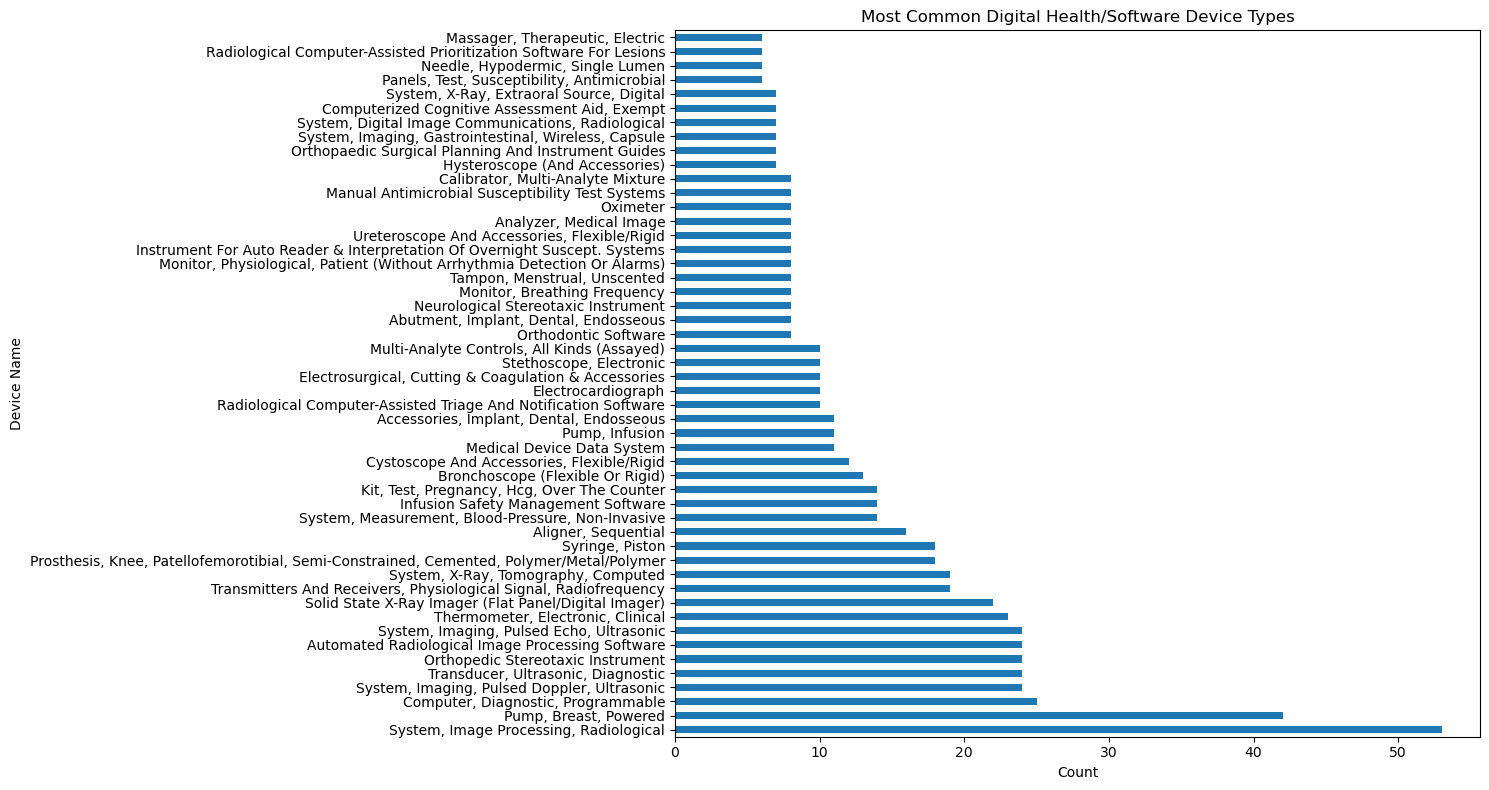

In [48]:
import matplotlib.pyplot as plt
# Create a horizontal bar plot of the most common device types
plt.figure(figsize=(15, 8))
device_counts = digital_health_results['openfda.device_name'].value_counts().head(50)
device_counts.plot(kind='barh')
plt.title('Most Common Digital Health/Software Device Types')
plt.xlabel('Count')
plt.ylabel('Device Name')
plt.tight_layout()
plt.show()


In [49]:
digital_health_results['openfda.device_name'].value_counts()

openfda.device_name
System, Image Processing, Radiological                         53
Pump, Breast, Powered                                          42
Computer, Diagnostic, Programmable                             25
System, Imaging, Pulsed Doppler, Ultrasonic                    24
Transducer, Ultrasonic, Diagnostic                             24
                                                               ..
Platelet And Plasma Separator For Bone Graft Handling           1
Table, Operating-Room, Ac-Powered                               1
Lung Computed Tomography System, Computer-Aided Detection       1
Stimulator, Muscle, Powered                                     1
Stimulator, Nerve, Electrical, Transcutaneous, For Migraine     1
Name: count, Length: 354, dtype: int64

In [7]:
import pandas as pd
ai_devices = pd.read_csv('/Users/mehulpatel/coding/fda_submissions/data/ai-ml-enabled-devices-csv.csv', encoding='latin1')
ai_devices.head()
ai_devices.shape


(1016, 6)

In [8]:
ai_devices

,Date of Final Decision,Submission Number,Device,Company,Panel (lead),Primary Product Code
0,9/27/2024,K240369,CAC (gated) Algorithm,BunkerHill Health,Radiology,JAK
1,9/27/2024,K241480,JBS-LVO,"JLK, Inc.",Radiology,QAS
2,9/27/2024,K240993,encevis (2.1),AIT Austrian Institute of Technology GmbH,Neurology,OMB
3,9/24/2024,K242292,uAI Easy Triage ICH,"Shanghai United Imaging Intelligence Co., Ltd.",Radiology,QAS
4,9/23/2024,K240013,EchoGo Heart Failure (2.0),Ultromics Limited,Cardiovascular,QUO
...,...,...,...,...,...,...
1011,2/10/2004,K033840,CELLAVISION DM96 AUTOMATIC HEMATOLOGY ANALYZER,CELLAVISION AB,Hematology,JOY
1012,3/15/2001,K003301,DIFFMASTER OCTAVIA AUTOMATIC HEMATOLOGY ANALYZER,CELLAVISION AB,Hematology,JOY
1013,6/26/1998,P970058,M1000 IMAGECHECKER,"Hologic, Inc.",Radiology,MYN
1014,3/11/1997,K955841,SLEEP SYSTEM FOR CLINICS & RESEARCH,COMPUMEDICS PTD LTD.,Anesthesiology,MNR


In [31]:
df_class_refined = df_class[['product_code', 'medical_specialty_description', 'device_class', 'device_name', 'definition']]

In [32]:
df_class_refined.head()

,product_code,medical_specialty_description,device_class,device_name,definition
0,FGN,"Gastroenterology, Urology",1,"Retractor, Non-Self-Retaining",
1,JTT,Microbiology,2,"Susceptibility Test Powders, Antimicrobial",
2,OAF,Unknown,3,"Implant, Hearing, Active, Middle Ear, Totally ...",Intended to provide useful hearing to persons ...
3,CFR,Clinical Chemistry,2,"Hexokinase, Glucose",
4,CAF,Anesthesiology,2,Nebulizer (Direct Patient Interface),


In [33]:
# Merge AI devices with device classification data
ai_devices_with_class = ai_devices.merge(
    df_class_refined,
    left_on='Primary Product Code',
    right_on='product_code',
    how='left'
)

# Display first few rows and shape of merged dataset
print(ai_devices_with_class.shape)
ai_devices_with_class.head()


(1016, 11)


,Date of Final Decision,Submission Number,Device,Company,Panel (lead),Primary Product Code,product_code,medical_specialty_description,device_class,device_name,definition
0,9/27/2024,K240369,CAC (gated) Algorithm,BunkerHill Health,Radiology,JAK,JAK,Radiology,2,"System, X-Ray, Tomography, Computed",
1,9/27/2024,K241480,JBS-LVO,"JLK, Inc.",Radiology,QAS,QAS,Radiology,2,Radiological Computer-Assisted Triage And Noti...,Radiological computer-assisted triage and noti...
2,9/27/2024,K240993,encevis (2.1),AIT Austrian Institute of Technology GmbH,Neurology,OMB,OMB,Neurology,2,Automatic Event Detection Software For Full-Mo...,Automatically mark or identify electroencephal...
3,9/24/2024,K242292,uAI Easy Triage ICH,"Shanghai United Imaging Intelligence Co., Ltd.",Radiology,QAS,QAS,Radiology,2,Radiological Computer-Assisted Triage And Noti...,Radiological computer-assisted triage and noti...
4,9/23/2024,K240013,EchoGo Heart Failure (2.0),Ultromics Limited,Cardiovascular,QUO,QUO,Cardiovascular,2,Adjunctive Heart Failure Status Indicator,The adjunctive heart failure status indicator ...


In [34]:
# Calculate and display the date range of AI device submissions
print("Date Range of AI Device Submissions:")
print(f"Earliest submission: {ai_devices_with_class['Date of Final Decision'].min()}")
print(f"Latest submission: {ai_devices_with_class['Date of Final Decision'].max()}")


Date Range of AI Device Submissions:
Earliest submission: 1/11/2018
Latest submission: 9/9/2024


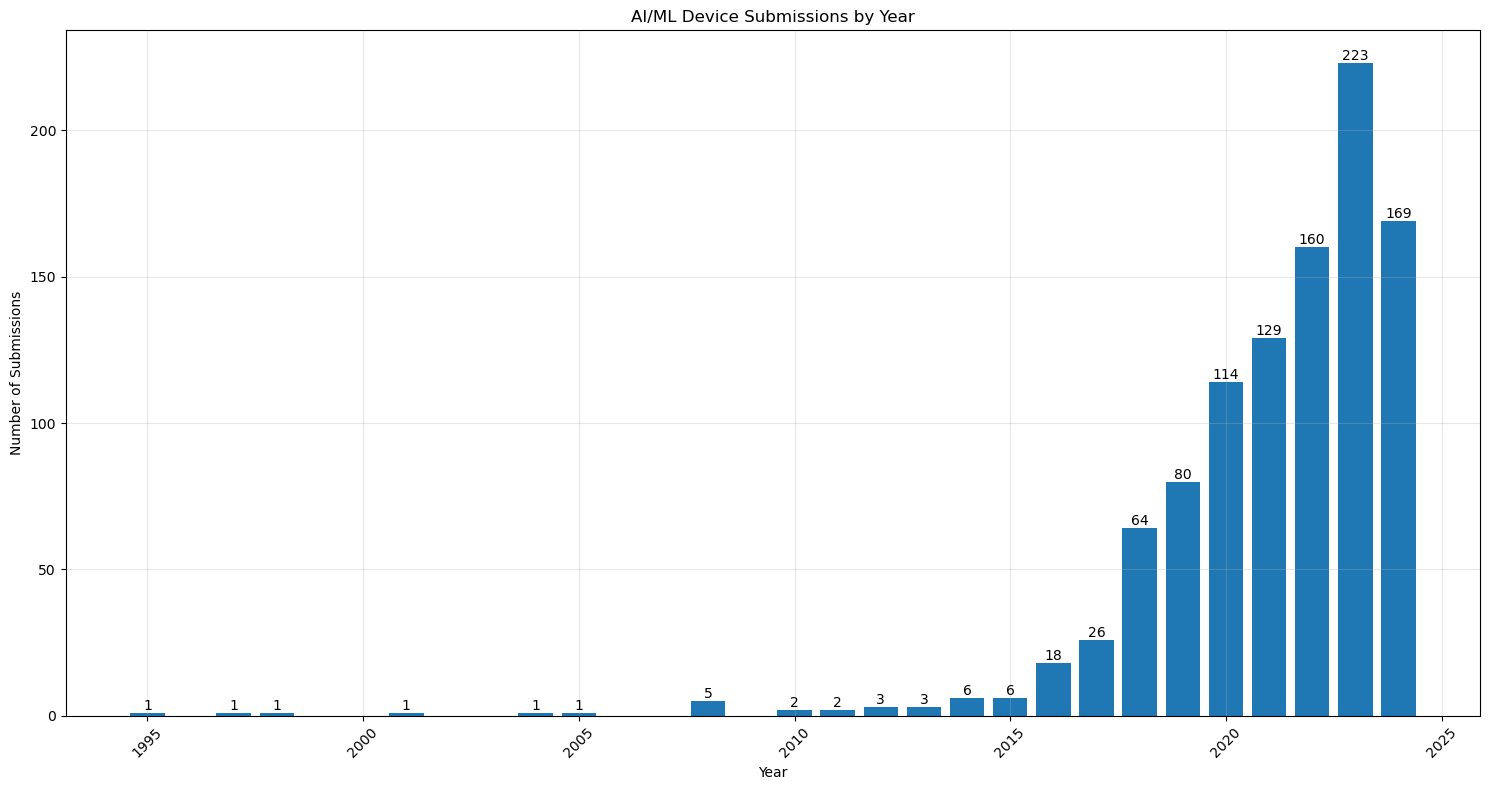

In [42]:
import matplotlib.pyplot as plt
# Convert date string to datetime
ai_devices_with_class['Date of Final Decision'] = pd.to_datetime(ai_devices_with_class['Date of Final Decision'])

# Group by year and count submissions
yearly_submissions = ai_devices_with_class['Date of Final Decision'].dt.year.value_counts().sort_index()

# Create bar plot
plt.figure(figsize=(15,8))
plt.bar(yearly_submissions.index, yearly_submissions.values)
plt.title('AI/ML Device Submissions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(yearly_submissions.values):
    plt.text(yearly_submissions.index[i], v, str(v), ha='center', va='bottom')

plt.tight_layout()
